In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

In [2]:
tol = 10**-4
k_max = 1000

def ltmp(xy,p):
    
    jac = np.eye(2)
    if xy[1]<p:
        xy[0] = (xy[0]+xy[1]/p) %1
        jac = np.dot(np.array([[1.0,1/p],[0.0,1.0]]),jac)
    if xy[0]<p:
        xy[1] = (xy[1]+xy[0]/p) %1
        jac = np.dot(np.array([[1.0,0.0],[1/p,1.0]]),jac)
    return xy,jac 

def ltmp_rev(xy,p):
    
    jac = np.eye(2)
    if xy[1]<p:
        xy[0] = (xy[0]+xy[1]/p) %1
        jac = np.dot(np.array([[1.0,1/p],[0.0,1.0]]),jac)
    if xy[0]<p:
        xy[1] = (xy[1]-xy[0]/p) %1
        jac = np.dot(np.array([[1.0,0.0],[-1/p,1.0]]),jac)
    return xy,jac 

def gen_le(f,xy,alpha,q):

    u = np.eye(2)
    v = np.zeros([2,2])
    le = np.array([0.0,0.0])
    sum = np.array([0.0,0.0])
    k = 0
    while k<k_max:
        k += 1
        le_old = le
        delta_x = np.dot(f(xy,alpha)[1],u)
        xy = f(xy,alpha)[0]
        for i in range(2):
            v[:,i] = delta_x[:,i]
            if i==1:
                v[:,i] -= np.dot(v[:,i],u[:,0])*u[:,0]
            u[:,i] = v[:,i]/np.linalg.norm(v[:,i],ord=2)
            sum[i] += (np.linalg.norm(v[:,i],ord=2))**q
            #print(q,(np.linalg.norm(v[:,i]))**q)
            le[i] = sum[i]/k
    return np.log(le[0])

In [6]:
ells = [gen_le(ltmp,np.array([0.66-0.01,0.1]),1.0,q) for q in range(-4,5)]

In [7]:
p = 1.0
pp = 1/p
ll = np.max(np.linalg.eig(np.array([[1,pp],[pp,1+pp**2]]))[0])

In [8]:
def try1(p,q):
    return np.log((p/(2-p))*ll**q + (2*(1-p)/(2-p))*(np.sqrt(2+2*p+p**2))**q)



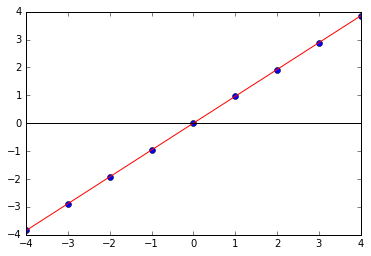

In [9]:
pl.plot(range(-4,5),ells,'o')
#pl.plot(range(-5,5),[np.log(1/3*(1+2**(q/2)+2**(-q/2))) for q in range(-5,5)])
#pl.plot(range(-5,5),[np.log(1/3*(1+2**(q)+2**(-q))) for q in range(-5,5)])
#pl.plot(range(-4,5),[try1(q) for q in range(-4,5)])
pl.plot(range(-4,5),[np.log(ll)*w for w in range(-4,5)],c='r')
pl.plot(range(-4,5),[0]*9,c='k')
pl.savefig('catmap_gle.pdf')

In [10]:
ells = [gen_le(ltmp_rev,np.array([0.66-0.01,0.1]),1.0,q) for q in range(-4,5)]

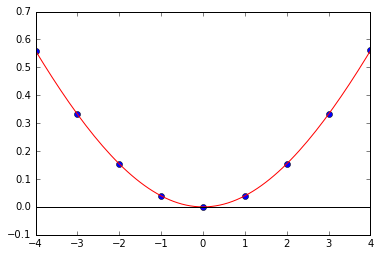

In [11]:
pl.plot(range(-4,5),ells,'o')
pl.plot(np.arange(-4,10.1,0.1),[np.log(1/3*(1+2**(q/2)+2**(-q/2))) for q in np.arange(-4,10.1,0.1)],c='r')
pl.plot(range(-4,5),[0]*9,c='k')
#pl.plot(range(2,10),[np.log(1/3)+0.5*w*np.log(2) for w in range(2,10)],c='g')
pl.xlim([-4,4])
pl.ylim([-0.1,0.7])
pl.savefig('p6_gle.pdf')

In [44]:
ells = [gen_le(ltmp,np.array([0.66-0.01,0.1]),0.6,q) for q in range(-14,15)]

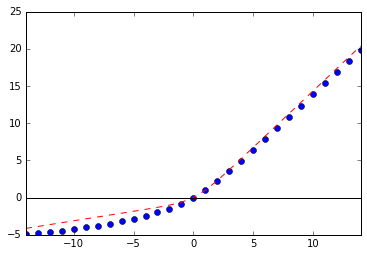

In [45]:
p = 0.6
pp = 1/p
ll = np.max(np.linalg.eig(np.array([[1,pp],[pp,1+pp**2]]))[0])

def try1(p,q):
    return np.log((p/(2-p))*ll**q + (2*(1-p)/(2-p))*((1/p)**(q/2)))

pl.plot(range(-14,15),ells,'o')
pl.plot(range(-14,15),[try1(0.6,q) for q in range(-14,15)],'--',c='r')
pl.plot(range(-14,15),[0]*29,c='k')
pl.xlim([-14,14])
pl.savefig('cone_gle.pdf')

In [255]:
p = 0.52
ells = [gen_le(ltmp_rev,np.array([0.1,0.1]),p,q) for q in range(-10,11)]

In [256]:
w = 1/p
M = np.array([[1,w],[-w,1-w**2]])

In [257]:
# which vectors are expanded/contracted by this matrix?
# start with vectors "in the cone"
#thetas = np.linspace(0.0,2*np.pi,1000)
# the following is the "nearest" invariant cone
thetas = np.linspace(3*np.pi/4,np.pi/2,1000)
xs = [np.cos(theta) for theta in thetas]
ys = [np.sin(theta) for theta in thetas]

In [258]:
vecmag = []
for i in range(1000):
    xs[i],ys[i] = np.dot(M,np.array([xs[i],ys[i]]))
    vecmag.append(np.sqrt(xs[i]**2+ys[i]**2))

In [259]:
prop_exp = sum(i >1 for i in vecmag)/1000
prop_con = sum(i<= 1 for i in vecmag)/1000

In [260]:
big = max(vecmag)
little = min(vecmag)

In [261]:
print(big,1/little)

3.31340341709 1.17325753497


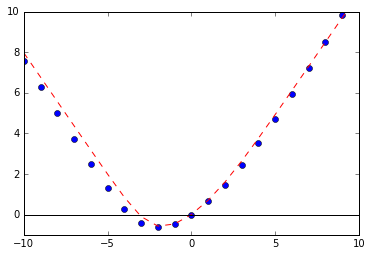

In [262]:

def try2(p,q):
    e1 = (2*(1-p)/(2-p))*(np.sqrt(w))**q
    e2 = prop_exp*(p/(2-p))*(big)**q
    e3 = prop_con*(p/(2-p))*(1/big)**q
    return np.log(e1+e2+e3)
pl.plot(range(-10,11),ells,'o')
pl.plot(range(-10,11),[try2(p,q) for q in range(-10,11)],'--',c='r')
pl.plot(range(-10,11),[0]*21,c='k')
pl.xlim([-10,10])
pl.ylim([-1,10])
pl.savefig('nocone_gle.pdf')

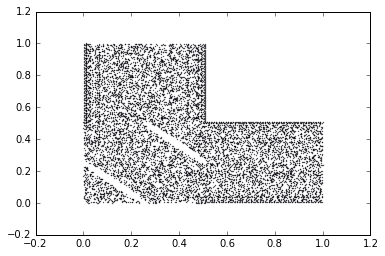

In [13]:
xy = np.array([0.01,0.01])
xdat = [xy[0]]
ydat = [xy[1]]
for k in range(10000):
    xy = ltmp_rev(xy,0.51)[0]
    xdat.append(xy[0])
    ydat.append(xy[1])
pl.scatter(xdat,ydat,s=0.1)

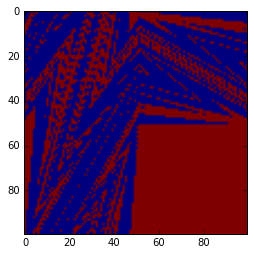

In [22]:
def blob(xy):
    if xy[0]<=0.5:
        return -1
    else:
        return 1
    
def blob2(xy):
    return np.sin(2.0*np.pi*xy[0])*np.sin(2.0*np.pi*xy[1])

# blobs
col = np.zeros([100,100])
for i in range(100):
    for j in range(100):
        xy = np.array([i/100.0,j/100.0])
        for k in range(6):
            xy = ltmp_rev(xy,0.51)[0]
        col[i][j] = blob(xy)
pl.imshow(col)

In [198]:
w = 1/0.4999999
M = np.array([[1,w],[-w,1-w**2]])
print(np.linalg.eig(M))

(array([-0.99873589, -1.00126571]), array([[ 0.70733035, -0.70688314],
       [-0.70688314,  0.70733035]]))


In [199]:
angle = np.arctan2(np.real(np.linalg.eig(M)[1][:,1][1]),np.real(np.linalg.eig(M)[1][:,1][0]))

In [200]:
angle

2.3558782624210033

In [166]:
# which vectors are expanded/contracted by this matrix?
# start with vectors "in the cone"
#thetas = np.linspace(0.0,2*np.pi,1000)
# the following is the "nearest" invariant cone
thetas = np.linspace(angle,np.pi/2,1000)
xs = [np.cos(theta) for theta in thetas]
ys = [np.sin(theta) for theta in thetas]

In [167]:
xs[0],ys[0]

(-0.44721359549995793, 0.89442719099991586)

In [168]:
vecmag = []
for i in range(1000):
    xs[i],ys[i] = np.dot(M,np.array([xs[i],ys[i]]))
    vecmag.append(np.sqrt(xs[i]**2+ys[i]**2))

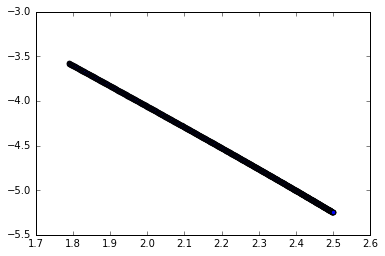

In [169]:
pl.scatter(xs,ys)

In [170]:
print(sum(i >1 for i in vecmag))
print(sum(i<= 1 for i in vecmag))

1000
0


In [117]:
min(vecmag)

0.96079215881551372